In [27]:
import matplotlib.pyplot as pt
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import time

In [28]:
data = pd.read_csv("/home/nitesh/Desktop/DecisionTreeClassifier/digit_recognizer/dataset/train.csv").as_matrix()
print(data[0])

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250
 253  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247
 253 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  29 207 253 235  77   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


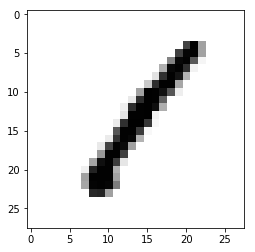

In [29]:
#training_data

x_train = data[0:22000, 1:]/255
train_lable = data[0:22000, 0]

#test_data
x_test = data[22000:, 1:]/255
test_lable = data[22000:, 0]

tmp = x_train[0]
tmp.shape=(28,28)
pt.imshow(255-tmp,cmap="gray")
pt.show()
x_train = np.array(x_train).reshape(-1, 28, 28, 1)

In [32]:
NAME = "MNIST-{}",format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [33]:
model =Sequential()
model.add(Conv2D(64, (3,3), padding="same", input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(64))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(x_train, train_lable, batch_size=32,epochs=10, validation_split=0.1, callbacks=[tensorboard])

Train on 19800 samples, validate on 2200 samples
Epoch 1/10
19800/19800 [==============================] - 57s 3ms/sample - loss: 0.2864 - acc: 0.9128 - val_loss: 0.1109 - val_acc: 0.9609
Epoch 2/10
19800/19800 [==============================] - 54s 3ms/sample - loss: 0.0699 - acc: 0.9778 - val_loss: 0.0683 - val_acc: 0.9732
Epoch 3/10
19800/19800 [==============================] - 55s 3ms/sample - loss: 0.0434 - acc: 0.9865 - val_loss: 0.0455 - val_acc: 0.9855
Epoch 4/10
19800/19800 [==============================] - 56s 3ms/sample - loss: 0.0344 - acc: 0.9890 - val_loss: 0.0448 - val_acc: 0.9855
Epoch 5/10
19800/19800 [==============================] - 58s 3ms/sample - loss: 0.0248 - acc: 0.9920 - val_loss: 0.0456 - val_acc: 0.9827
Epoch 6/10
19800/19800 [==============================] - 53s 3ms/sample - loss: 0.0174 - acc: 0.9944 - val_loss: 0.0472 - val_acc: 0.9855
Epoch 7/10
19800/19800 [==============================] - 53s 3ms/sample - loss: 0.0173 - acc: 0.9944 - val_loss: 0.0

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
activation_9 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
__________

In [35]:
x_test = np.array(x_test).reshape(-1, 28, 28, 1)
model.evaluate(x_test, test_lable)

20000/20000 [==============================] - 13s 668us/sample - loss: 0.0709 - acc: 0.9832


[0.0708735673795356, 0.9832]